In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg

We decided to drop many columns after analysimng the data and seeing that it was too complicated to incorporate some columns, as in our opinion, the relevance they represented in the data was not nig enough.
and also to make the analysis more simple.
columns out :
'weigth','value','w/f','sm','a/w','d/w','ir','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',

In [2]:
def clean_fifa21(df):
  
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = cols
    
    df_num = df._get_numeric_data()
    df_num = df_num[df_num['volleys'].isna()==False]
    df_num = df_num[df_num['composure'].isna()==False]
    
    list_dummies = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',]
    for col in df[list_dummies]:
        df[col] = df[col].str.split("+", n = 1, expand = True)[0]
    
    dummies_2 = ['w/f','sm','ir']
    for col in df[dummies_2]:
        df[col] = df[col].str.split(" ", n = 1, expand = True)[0]
    
    valid_columns = ['age','foot','growth','attacking','skill','movement','power','mentality','defending','goalkeeping','base_stats','pac','sho','pas','dri','phy','ova']

    from sklearn.preprocessing import LabelEncoder
    label_encoded = LabelEncoder().fit(df['foot']).transform(df['foot']) # ordered wrt value counts
    label_encoded = pd.DataFrame(label_encoded)
    # label_encoded['foot'].value_counts()
    df['foot']= label_encoded
    

    return df[valid_columns]
    

In [3]:
data = pd.read_csv('fifa21_train.csv')
fifa = clean_fifa21(data)
fifa


,age,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,pac,sho,pas,dri,phy,ova
0,26,1,1,258,286,346,306,290,148,48,357,69,51,63,63,60,64
1,30,1,0,365,375,404,372,313,77,55,412,83,75,68,82,71,77
2,33,1,0,336,424,424,308,332,80,21,404,80,77,78,86,56,80
3,22,1,13,242,259,282,277,257,168,42,329,57,44,54,57,60,59
4,23,1,8,249,280,324,280,294,185,52,360,66,44,60,64,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,0,5,224,248,333,273,266,184,61,347,75,28,56,59,69,65
11697,27,1,4,84,96,237,217,101,41,347,387,72,67,66,72,70,70
11698,22,1,8,286,291,388,278,241,62,57,337,76,60,60,72,43,67
11699,26,1,7,254,284,198,258,241,113,81,400,72,63,70,72,66,68


In [4]:
correlations_matrix = fifa.corr()
correlations_matrix

,age,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,pac,sho,pas,dri,phy,ova
age,1.000000,0.014945,-0.854136,0.191137,0.175981,-0.051802,0.314169,0.278804,0.117902,0.120656,0.417633,-0.176232,0.311175,0.402361,0.242675,0.434448,0.519799
foot,0.014945,1.000000,0.008409,-0.084806,-0.131803,-0.102549,-0.024835,-0.086075,-0.109072,0.098895,-0.041586,-0.058729,0.052458,-0.055750,-0.039937,0.052788,-0.022588
growth,-0.854136,0.008409,1.000000,-0.281668,-0.262893,-0.101370,-0.427800,-0.348028,-0.157743,-0.050320,-0.516137,0.019677,-0.334891,-0.439781,-0.320569,-0.484123,-0.596642
attacking,0.191137,-0.084806,-0.281668,1.000000,0.928584,0.692493,0.823527,0.888604,0.311367,-0.769826,0.425923,0.181119,0.349931,0.370180,0.379978,0.107896,0.433092
skill,0.175981,-0.131803,-0.262893,0.928584,1.000000,0.725776,0.753061,0.885893,0.370432,-0.716263,0.499657,0.217046,0.325009,0.514101,0.486271,0.031079,0.442666
movement,-0.051802,-0.102549,-0.101370,0.692493,0.725776,1.000000,0.560489,0.610661,0.174070,-0.563037,0.450295,0.705488,0.227513,0.307423,0.497619,-0.111590,0.304496
power,0.314169,-0.024835,-0.427800,0.823527,0.753061,0.560489,1.000000,0.823428,0.361816,-0.573683,0.573182,0.157692,0.374796,0.355994,0.332691,0.519953,0.547839
mentality,0.278804,-0.086075,-0.348028,0.888604,0.885893,0.610661,0.823428,1.000000,0.587906,-0.727656,0.515576,0.065620,0.186766,0.408774,0.308240,0.312193,0.494590
defending,0.117902,-0.109072,-0.157743,0.311367,0.370432,0.174070,0.361816,0.587906,1.000000,-0.496275,0.221140,-0.213725,-0.485337,0.061623,-0.205621,0.388696,0.243725
goalkeeping,0.120656,0.098895,-0.050320,-0.769826,-0.716263,-0.563037,-0.573683,-0.727656,-0.496275,1.000000,0.097712,-0.004254,0.246624,0.171304,0.160553,0.062021,0.038584


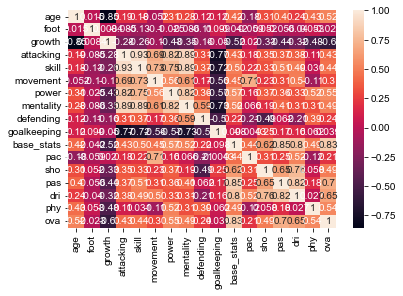

In [5]:
sns.heatmap(correlations_matrix, annot=True)
sns.set(rc = {'figure.figsize':(40,16)})
plt.rcParams["figure.autolayout"] = True
plt.show()

The columns 'movement','skill','movement','mentality' and 'attacking' are highly correlated between them , so we keep the most correated with the target ('ova') to represent them which is 'attacking' and we drop the rest.

In [7]:
reduced_data = fifa.drop(['movement','skill','movement','mentality'],axis=1)
reduced_data.columns

Index(['age', 'foot', 'growth', 'attacking', 'power', 'defending',
       'goalkeeping', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'phy', 'ova'],
      dtype='object')

x, y split 

In [9]:
y = reduced_data['ova']         # Choosing 'y'="ova" as my target
X = reduced_data.drop(['ova'], axis=1) #all data except the 'ova'

lm2 = linear_model.LinearRegression()
lm2.fit(X,y)
print("R2-score is:",lm2.score(X,y))
y_pred = lm2.predict(X)
print("MSE is :",mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them

R2-score is: 0.7900180504990193
MSE is : 9.927201485082216


In [10]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(reduced_data)
x_normalized = transformer.transform(reduced_data)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=reduced_data.columns)

(11701, 14)


,age,foot,growth,attacking,power,defending,goalkeeping,base_stats,pac,sho,pas,dri,phy,ova
0,0.370370,1.0,0.074074,0.556931,0.556270,0.524,0.084309,0.492366,0.614286,0.447368,0.558824,0.522388,0.500000,0.472727
1,0.518519,1.0,0.037037,0.821782,0.768489,0.240,0.100703,0.702290,0.814286,0.763158,0.632353,0.805970,0.666667,0.709091
2,0.629630,1.0,0.037037,0.750000,0.562701,0.252,0.021077,0.671756,0.771429,0.789474,0.779412,0.865672,0.439394,0.763636
3,0.222222,1.0,0.518519,0.517327,0.463023,0.604,0.070258,0.385496,0.442857,0.355263,0.426471,0.432836,0.500000,0.381818
4,0.259259,1.0,0.333333,0.534653,0.472669,0.672,0.093677,0.503817,0.571429,0.355263,0.514706,0.537313,0.590909,0.490909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.0,0.222222,0.472772,0.450161,0.668,0.114754,0.454198,0.700000,0.144737,0.455882,0.462687,0.636364,0.490909
11697,0.407407,1.0,0.185185,0.126238,0.270096,0.096,0.784543,0.606870,0.657143,0.657895,0.602941,0.656716,0.651515,0.581818
11698,0.222222,1.0,0.333333,0.626238,0.466238,0.180,0.105386,0.416031,0.714286,0.565789,0.514706,0.656716,0.242424,0.527273
11699,0.370370,1.0,0.296296,0.547030,0.401929,0.384,0.161593,0.656489,0.657143,0.605263,0.661765,0.656716,0.590909,0.545455


In [11]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
# # Applying linear regression
linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test) 

In [14]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7844381184840222

In [15]:
np.sqrt(mean_squared_error(y_test,predictions_test))

3.134500784302452

### NOW WE CLEAN THE PREDICTION DATA SET 


In [17]:
data_val = pd.read_csv('fifa21_validate.csv')
fifa_val = clean_fifa21(data_val)
fifa_val

,age,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,pac,sho,pas,dri,phy,ova
0,23,1,7,230,228,303,288,246,200,56,334,64,30,50,50,74,67
1,22,1,5,298,330,375,323,286,61,53,358,74,67,62,74,57,68
2,19,1,17,48,52,165,171,76,27,269,295,56,52,53,55,53,54
3,16,1,23,215,224,275,242,230,159,36,303,58,34,47,52,59,55
4,24,1,5,295,327,320,337,314,211,60,407,67,62,68,70,71,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,21,0,11,197,207,344,245,232,167,51,315,76,28,46,55,57,60
1995,21,1,9,77,70,192,177,88,36,288,318,60,55,57,62,54,59
1996,27,0,0,332,373,351,329,306,118,58,388,65,69,78,77,60,76
1997,34,1,0,268,261,288,300,297,182,43,346,53,47,58,58,69,63


x, y split

In [78]:
y2 = fifa_val['ova']         # Choosing 'y'="ova" as my target
X2 = fifa_val.drop(['ova'], axis=1) #all data except the 'ova'

In [79]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(fifa_val)
x2_normalized = transformer.transform(fifa_val)
print(x2_normalized.shape)
x2_normalized
pd.DataFrame(x2_normalized, columns=fifa_val.columns)

(1999, 17)


,age,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,pac,sho,pas,dri,phy,ova
0,0.225806,1.0,0.28,0.509804,0.463158,0.535503,0.541219,0.517906,0.708502,0.097156,0.338710,0.531250,0.138889,0.328125,0.327869,0.719298,0.441860
1,0.193548,1.0,0.20,0.700280,0.731579,0.748521,0.666667,0.628099,0.145749,0.090047,0.435484,0.687500,0.652778,0.515625,0.721311,0.421053,0.465116
2,0.096774,1.0,0.68,0.000000,0.000000,0.127219,0.121864,0.049587,0.008097,0.601896,0.181452,0.406250,0.444444,0.375000,0.409836,0.350877,0.139535
3,0.000000,1.0,0.92,0.467787,0.452632,0.452663,0.376344,0.473829,0.542510,0.049763,0.213710,0.437500,0.194444,0.281250,0.360656,0.456140,0.162791
4,0.258065,1.0,0.20,0.691877,0.723684,0.585799,0.716846,0.705234,0.753036,0.106635,0.633065,0.578125,0.583333,0.609375,0.655738,0.666667,0.511628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.161290,0.0,0.44,0.417367,0.407895,0.656805,0.387097,0.479339,0.574899,0.085308,0.262097,0.718750,0.111111,0.265625,0.409836,0.421053,0.279070
1995,0.161290,1.0,0.36,0.081232,0.047368,0.207101,0.143369,0.082645,0.044534,0.646919,0.274194,0.468750,0.486111,0.437500,0.524590,0.368421,0.255814
1996,0.354839,0.0,0.00,0.795518,0.844737,0.677515,0.688172,0.683196,0.376518,0.101896,0.556452,0.546875,0.680556,0.765625,0.770492,0.473684,0.651163
1997,0.580645,1.0,0.00,0.616246,0.550000,0.491124,0.584229,0.658402,0.635628,0.066351,0.387097,0.359375,0.375000,0.453125,0.459016,0.631579,0.348837


In [80]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# # Applying linear regression
linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test) 

In [82]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)
print(predictions_test)

[71.20285923 68.4222973  70.54700911 ... 71.10135373 71.24593185
 70.92281116]


In [83]:
np.sqrt(mean_squared_error(y_test,predictions_test))

3.1923713248344594